In [105]:
import pandas as pd
import numpy as np
import os
import re
from tqdm import tqdm
import matplotlib.pyplot as plt

In [93]:
def load_swda():
    df_convs = dict(
        num = [],
        filename = [],
        topic = [],
        date = [],
        transcriber = [],
        utt_coder = [],
        difficulty = [],
        topicality = [],
        naturalness = [],
        echo_from_A = [],
        echo_from_B = [],
        static_on_A = [],
        static_on_B = [],
        background_A = [],
        background_B = [],
        remarks = [],
        conv = []
    )
    index = []
    for n_sess in tqdm(range(14)):
        convs_path = f"../data/swda/sw{n_sess:02}utt"
        convs = os.listdir(convs_path)
        for conv in convs:
            match = re.search(r"sw_(\d+)_(\d+)",conv)
            if match is None:
                continue
            idx, num = match.group(1), match.group(2)
            index.append(int(idx))
            df_convs["num"] = int(num)
            with open(os.path.join(convs_path,f"sw_{idx}_{num}.utt")) as f:
                file = f.read()
            filename = re.search(r"^[\s\w#\d]*FILENAME:\s+((yes\n)?[\d_]+)",file,flags=re.MULTILINE).group(1)
            df_convs["filename"].append(filename)

            topic = re.search(r"^TOPIC#(:?)\s+(\d+)",file,flags=re.MULTILINE).group(2)
            df_convs["topic"].append(int(topic))

            date = re.search(r"^DATE:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["date"].append(date)

            transcriber = re.search(r"^TRANSCRIBER:\s+(\w+)",file,flags=re.MULTILINE).group(1)
            df_convs["transcriber"].append(transcriber)

            utt_coder = re.search(r"^UTT_CODER:\s+(\w+)",file,flags=re.MULTILINE)
            if utt_coder is not None:
                utt_coder = utt_coder.group(1)
            else:
                utt_coder = np.nan
            df_convs["utt_coder"].append(utt_coder)

            difficulty = re.search(r"^DIFFICULTY:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["difficulty"].append(int(difficulty))

            topicality = re.search(r"^TOPICALITY:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["topicality"].append(int(topicality))

            naturalness = re.search(r"^NATURALNESS:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["naturalness"].append(int(naturalness))

            echo_from_A = re.search(r"^ECHO_FROM_A:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["echo_from_A"].append(echo_from_A)

            echo_from_B = re.search(r"^ECHO_FROM_B:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["echo_from_B"].append(echo_from_B)

            static_on_A = re.search(r"^STATIC_ON_A:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["static_on_A"].append(static_on_A)

            static_on_B = re.search(r"^STATIC_ON_B:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["static_on_B"].append(static_on_B)

            background_A = re.search(r"^BACKGROUND_A:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["background_A"].append(background_A)

            background_B = re.search(r"^BACKGROUND_B:\s+(\d+)",file,flags=re.MULTILINE).group(1)
            df_convs["background_B"].append(background_B)

            remarks = re.search(r"^REMARKS:\s+((.+\n)+)",file,flags=re.MULTILINE).group(1)
            remarks = re.sub(r"\s+"," ",remarks)
            df_convs["remarks"].append(remarks)

            utts_iter = re.finditer(r"^(.+)\s+((A|B)\.(\d+) utt(\d+):\s+(.+))",file,flags=re.MULTILINE)
            df_conv = []
            for match in utts_iter:
                df_conv.append(
                    dict(
                        da = match.group(1),
                        speaker = match.group(3),
                        turn_num = int(match.group(4)),
                        utt_num = int(match.group(5)),
                        utt = match.group(6)
                    )
                )
            df_conv = pd.DataFrame.from_records(df_conv)
            df_convs["conv"].append(df_conv)
    df_convs = pd.DataFrame(df_convs,index=index)
    df_convs = df_convs.sort_index()
    return df_convs

df_convs = load_swda()
df_convs

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  9.39it/s]


,num,filename,topic,date,transcriber,utt_coder,difficulty,topicality,naturalness,echo_from_A,echo_from_B,static_on_A,static_on_B,background_A,background_B,remarks,conv
1,2838,4325_1632_1519,323,920323,glp,tc,1,3,2,4,1,1,1,1,2,None.,da speaker turn_num utt_num ...
2,2838,4330_1635_1597,354,920323,glp,TC,2,2,3,2,1,1,1,1,2,None.,da speaker turn_num utt_num ...
3,2838,4103_1606_1564,357,920309,SS,TC,2,3,1,1,1,1,1,1,1,None.,da speaker turn_num utt_num ...
4,2838,4327_1619_1639,341,920323,glp,tc,3,3,1,1,1,1,1,1,2,None.,da speaker turn_num utt_num \...
5,2838,4646_1197_1670,305,920410,nk,tc,1,1,1,1,1,1,1,1,1,None.,da speaker turn_num utt_num ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2838,4179_1574_1583,351,920313,glp,NaN,1,1,2,2,1,1,1,1,1,None.,da speaker turn_num utt_num \...
1325,2838,4384_1653_1646,323,920325,nk,TC,1,1,1,1,1,1,1,1,2,None,da speaker turn_num utt_num \...
1326,2838,4622_1671_1528,303,920409,nk,TC,2,1,1,1,1,1,1,1,1,None.,da speaker turn_num utt_num \...
1327,2838,4643_1680_1654,370,920410,nk,NaN,1,1,1,1,1,1,1,1,1,None. TB_COMMENT: THIS IS A CORRECTED VERSION ...,da speaker turn_num utt_num ...


In [94]:
df_convs["naturalness"].value_counts()

1    771
2    268
3    100
4     15
5      1
Name: naturalness, dtype: int64

In [95]:
df_convs.loc[df_convs["naturalness"] == 5,"conv"].iloc[0]

,da,speaker,turn_num,utt_num,utt
0,o,A,1,1,"Okay, /"
1,sd^t,A,1,2,we're supposed to talk about vacations. /
2,aa,B,2,1,"Right, /"
3,qw,B,2,2,"{D so, } {F uh, } {D well, } {F uh, } what k..."
4,b,B,4,1,Uh-huh. /
...,...,...,...,...,...
105,qw,B,74,1,# Where have you gone first? # /
106,qh,A,75,1,"{F Oh, } [ g-, + where have I gone ] that's an..."
107,b,B,76,1,"Yeah, /"
108,%,B,76,2,"{E I mean, } -/"


<AxesSubplot:>

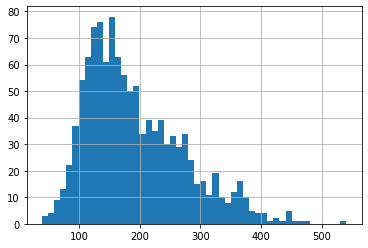

In [100]:
df_convs["conv"].apply(lambda x: len(x)).hist(bins=50)

<AxesSubplot:>

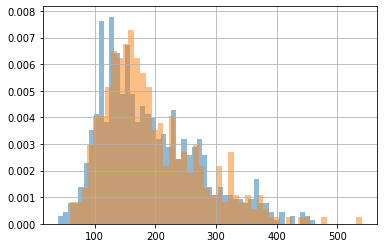

In [123]:
fig, ax = plt.subplots()

df_convs.loc[df_convs["naturalness"] < 2,"conv"].apply(lambda x: len(x)).hist(bins=50,density=True,ax=ax,alpha=.5)
df_convs.loc[df_convs["naturalness"] >= 2,"conv"].apply(lambda x: len(x)).hist(bins=50,density=True,ax=ax,alpha=.5)

In [124]:
df_convs.groupby("naturalness").apply(lambda x: len(x["conv"]))

naturalness
1    771
2    268
3    100
4     15
5      1
dtype: int64